In [1]:
import csv
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

from miniml.decomposition import *

**dataset 1**

In [2]:
x = np.array([[i, i, i+random.uniform(-0.5,0.5)] for i in np.arange(0, 10, 0.5)])
pca = PCA(x)
pca.fit(n_components=2)

reduced_x = pca.transform(x)

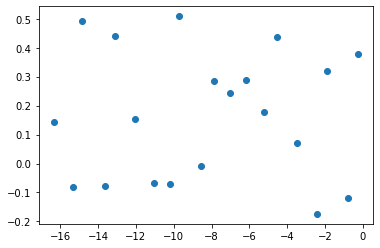

In [3]:
_ = plt.scatter(reduced_x[:,0], reduced_x[:,1])

**dataset 2**

In [4]:
data = []
y = []
with open('./datasets/digit-recognizer/train.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for i, row in enumerate(spamreader):
        if not i: continue
        xy = row[0].split(',')
        x, label = list(map(float, xy[1:])), int(xy[0])
        data.append(x)
        y.append(label)
        if i == 100: break
data = np.array(data)
y = np.array(y)

In [5]:
pca = PCA(data)
pca.fit(n_components=2)

reduced_data = np.real(pca.transform(data))

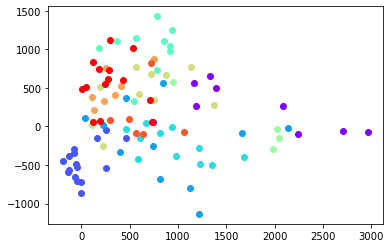

In [6]:
class_n = len(np.unique(y))
class_names = ['Class ' + str(int(c+1)) for c in range(class_n)]
color = iter(cm.rainbow(np.linspace(0, 1, class_n)))
for i in range(class_n):
    _ = plt.scatter(reduced_data[y == i, 0],
            reduced_data[y == i, 1],
            color=next(color),
            label=class_names[i])